In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
match_dt = pd.read_csv('C:/Users/abc/CDAC_py_pract/C10_Input_Files/datasets/dim_match_summary.csv')
plyrs_dt = pd.read_csv('C:/Users/abc/CDAC_py_pract/C10_Input_Files/datasets/dim_players.csv')
batng_summary = pd.read_csv('C:/Users/abc/CDAC_py_pract/C10_Input_Files/datasets/fact_bating_summary.csv')
bowlng_summary = pd.read_csv('C:/Users/abc/CDAC_py_pract/C10_Input_Files/datasets/fact_bowling_summary.csv')

# Match Data Analyses :-

In [3]:
print('Match data shape :- ',match_dt.shape)
print('players data shape :- ',plyrs_dt.shape)
print("Batting summary data shape :- ",batng_summary.shape)
print("Bowling summary data shape :- ",bowlng_summary.shape)

Match data shape :-  (206, 6)
players data shape :-  (292, 5)
Batting summary data shape :-  (3268, 11)
Bowling summary data shape :-  (2436, 14)


In [4]:
match_dt.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942


In [5]:
match_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team1      206 non-null    object
 1   team2      206 non-null    object
 2   winner     206 non-null    object
 3   margin     206 non-null    object
 4   matchDate  206 non-null    object
 5   match_id   206 non-null    object
dtypes: object(6)
memory usage: 9.8+ KB


In [6]:
match_dt.team1.value_counts()

Super Kings     29
Royals          27
Punjab Kings    27
RCB             26
Mumbai          19
KKR             18
Capitals        16
Sunrisers       15
Titans          15
Super Giants    14
Name: team1, dtype: int64

In [7]:
match_dt.team2.value_counts()

KKR             27
Capitals        27
Sunrisers       26
Mumbai          25
RCB             19
Royals          18
Titans          18
Super Kings     16
Punjab Kings    15
Super Giants    15
Name: team2, dtype: int64

In [8]:
print("Number of matches each team played :- ")
match_count = pd.concat([match_dt.team1,match_dt.team2])
print(match_count.value_counts())
print("\n",'*'*50,'\n')


Number of matches each team played :- 
Super Kings     45
RCB             45
KKR             45
Royals          45
Mumbai          44
Capitals        43
Punjab Kings    42
Sunrisers       41
Titans          33
Super Giants    29
dtype: int64

 ************************************************** 



Number of matches each team played bwtween 2021 to 2023:


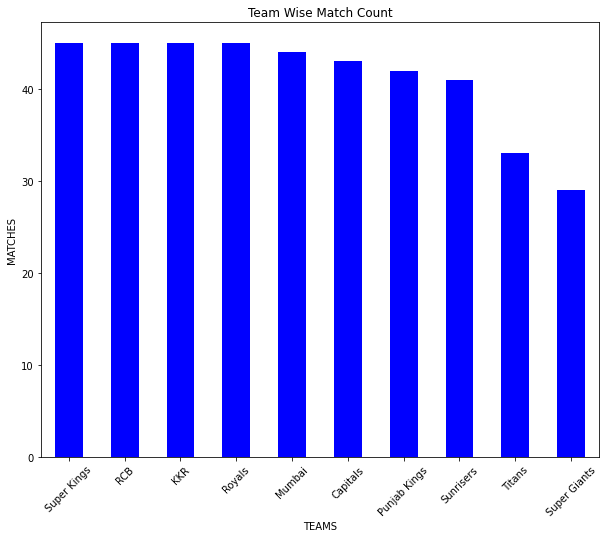

In [9]:
print("Number of matches each team played bwtween 2021 to 2023:")
match_count = pd.concat([match_dt.team1, match_dt.team2])
team_match_counts = match_count.value_counts()
#print(team_match_counts)
plt.figure(figsize=(10,8))
plt.title("Team Wise Match Count")
team_match_counts.plot(kind='bar', color="blue")
plt.xlabel("TEAMS")
plt.ylabel("MATCHES")
plt.xticks(rotation=45)
plt.show()


In [10]:
match_dt.dtypes

team1        object
team2        object
winner       object
margin       object
matchDate    object
match_id     object
dtype: object

In [11]:
match_dt['matchDate'] = pd.to_datetime(match_dt['matchDate'])
match_dt

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942
...,...,...,...,...,...,...
201,Mumbai,RCB,RCB,8 wickets,2023-04-02,T202485
202,Royals,Sunrisers,Royals,72 runs,2023-04-02,T209117
203,Super Giants,Capitals,Super Giants,50 runs,2023-04-01,T208512
204,Punjab Kings,KKR,Punjab Kings,7 runs,2023-04-01,T202853


In [12]:
print("Total number of matches playd in 3 years :- ",match_dt.value_counts().sum(),"\n\n")
print("Number of matches each team won in last 3 years :- \n\n")
winner_counts = match_dt.winner.value_counts()
print(winner_counts)

Total number of matches playd in 3 years :-  206 


Number of matches each team won in last 3 years :- 


Super Kings     25
RCB             25
Titans          23
Royals          22
KKR             21
Capitals        21
Mumbai          20
Punjab Kings    19
Super Giants    17
Sunrisers       13
Name: winner, dtype: int64


In [13]:
teams = pd.concat([match_dt['team1'],match_dt['team2']])
print("winning against total number of matches played in past 3 years :- \n",\
      (match_dt['winner'].value_counts()/teams.value_counts())*100)

winning against total number of matches played in past 3 years :- 
 Capitals        48.837209
KKR             46.666667
Mumbai          45.454545
Punjab Kings    45.238095
RCB             55.555556
Royals          48.888889
Sunrisers       31.707317
Super Giants    58.620690
Super Kings     55.555556
Titans          69.696970
dtype: float64


In [14]:
chaser_winner = {}

for ind,row in match_dt.iterrows():
    
    if row['team2'] == row['winner']:
        chaser_winner[row['team2']]= chaser_winner.get(row['team2'],0)+1
print(chaser_winner)

sorted_teams = sorted(chaser_winner.items(),key = lambda x : x[1],reverse=True)
top_2_teams = sorted_teams[:4]
top_2_teams

{'KKR': 14, 'Super Kings': 11, 'RCB': 10, 'Punjab Kings': 8, 'Mumbai': 13, 'Capitals': 14, 'Royals': 9, 'Sunrisers': 9, 'Titans': 14, 'Super Giants': 5}


[('KKR', 14), ('Capitals', 14), ('Titans', 14), ('Mumbai', 13)]

In [15]:
print("Total number of time chasing team won :- ",sum(chaser_winner.values()))

Total number of time chasing team won :-  107


### Year Wise Team Performance Analyses

In [16]:
# match data year wise

match_dt_21 = match_dt[match_dt['matchDate'].dt.year==2021]
match_dt_22 = match_dt[match_dt['matchDate'].dt.year==2022]
match_dt_23 = match_dt[match_dt['matchDate'].dt.year==2023]

In [17]:
# Taking shape for each dataframe

print(match_dt_21.shape)
print(match_dt_22.shape)
print(match_dt_23.shape)


(59, 6)
(74, 6)
(72, 6)


In [18]:
print("Team wise number of matches played each year :-")

teams_21 = pd.concat([match_dt_21['team1'],match_dt_21['team2']])
teams_22 = pd.concat([match_dt_22['team1'],match_dt_22['team2']])
teams_23 = pd.concat([match_dt_23['team1'],match_dt_23['team2']])

print(teams_21.value_counts())
print("*"*70)
print(teams_22.value_counts())
print("*"*70)
print(teams_23.value_counts())

Team wise number of matches played each year :-
KKR             17
Super Kings     16
Capitals        15
RCB             15
Mumbai          14
Royals          14
Punjab Kings    14
Sunrisers       13
dtype: int64
**********************************************************************
Royals          17
RCB             16
Titans          16
Super Giants    15
Sunrisers       14
Capitals        14
Super Kings     14
KKR             14
Punjab Kings    14
Mumbai          14
dtype: int64
**********************************************************************
Titans          16
Mumbai          16
Super Kings     14
RCB             14
Sunrisers       14
Super Giants    14
Punjab Kings    14
Capitals        14
KKR             14
Royals          14
dtype: int64


In [19]:
print("Number of matches each team won for 3 years :- \n")
print("For year 2021 \n",match_dt_21.winner.value_counts(),"\n")
print("For year 2022 \n",match_dt_22.winner.value_counts(),"\n")
print("For year 2023 \n",match_dt_23.winner.value_counts())

Number of matches each team won for 3 years :- 

For year 2021 
 Super Kings     11
KKR              9
RCB              9
Capitals         9
Mumbai           7
Punjab Kings     6
Royals           5
Sunrisers        3
Name: winner, dtype: int64 

For year 2022 
 Titans          12
Royals          10
RCB              9
Super Giants     9
Punjab Kings     7
Capitals         7
Sunrisers        6
KKR              6
Mumbai           4
Super Kings      4
Name: winner, dtype: int64 

For year 2023 
 Titans          11
Mumbai           9
Super Kings      9
Super Giants     8
Royals           7
RCB              7
KKR              6
Punjab Kings     6
Capitals         5
Sunrisers        4
Name: winner, dtype: int64


# Players Data Analyses :- 

In [20]:
plyrs_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          292 non-null    object
 1   team          292 non-null    object
 2   battingStyle  292 non-null    object
 3   bowlingStyle  292 non-null    object
 4   playingRole   292 non-null    object
dtypes: object(5)
memory usage: 11.5+ KB


In [21]:
plyrs_dt.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [22]:
print("Total Number of Teams :- ",plyrs_dt.team.nunique())

Total Number of Teams :-  10


In [23]:
team_wise_players = plyrs_dt.groupby('team')

print("Team wise players count :- ")
players_count_team_wise = team_wise_players.size()
players_count_team_wise

Team wise players count :- 


team
Capitals        29
KKR             35
Mumbai          39
Punjab Kings    38
RCB             30
Royals          33
Sunrisers       35
Super Giants    12
Super Kings     28
Titans          13
dtype: int64

In [24]:
plyrs_dt['playingRole'].unique()

array(['Batter', 'Middle order Batter', 'Batting Allrounder',
       'Opening Batter', 'Allrounder', 'Bowling Allrounder',
       'Wicketkeeper Batter', 'Top order Batter', 'Bowler'], dtype=object)

# Batting Summary Analyses :-

In [25]:
batng_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match_id     3268 non-null   object
 1   match        3268 non-null   object
 2   teamInnings  3268 non-null   object
 3   battingPos   3268 non-null   int64 
 4   batsmanName  3268 non-null   object
 5   out/not_out  3268 non-null   object
 6   runs         3268 non-null   int64 
 7   balls        3268 non-null   int64 
 8   4s           3268 non-null   int64 
 9   6s           3268 non-null   int64 
 10  SR           3268 non-null   object
dtypes: int64(5), object(6)
memory usage: 281.0+ KB


In [26]:
batng_summary.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [27]:
print("Players average performance analyses :-\n")

batter_avg_performane = batng_summary.groupby('batsmanName')['runs'].mean()
batter_avg_performance_ordered = batter_avg_performane.sort_values(ascending=False)
print("Top 10 highest average performace over past 3 years :- ")
batter_avg_performance_ordered.head(10)

Players average performance analyses :-

Top 10 highest average performace over past 3 years :- 


batsmanName
VivrantSharma      69.000000
ChrisLynn          49.000000
DevonConway        42.000000
KLRahul            40.972973
HeinrichKlaasen    40.727273
FafduPlessis       39.804348
JosButtler         39.710526
SaiSudharsan       39.000000
ShubmanGill        37.020000
RajatPatidar       36.727273
Name: runs, dtype: float64

In [28]:
print("Players total runs :- \n")

batter_total_runs = batng_summary.groupby('batsmanName')['runs'].sum()

batter_total_runs_ordered = batter_total_runs.sort_values(ascending=False)
print("Top 10 highest total runs scored in last 3 years :-")
batter_total_runs_ordered.head(10)

Players total runs :- 

Top 10 highest total runs scored in last 3 years :-


batsmanName
ShubmanGill        1851
FafduPlessis       1831
RuturajGaikwad     1593
KLRahul            1516
JosButtler         1509
ShikharDhawan      1392
ViratKohli         1385
SanjuSamson        1304
SuryakumarYadav    1225
GlennMaxwell       1214
Name: runs, dtype: int64

In [29]:
# adding date column in batting summary df
match_year = match_dt[['match_id','matchDate']]
match_year['matchDate'] = pd.to_datetime(match_year['matchDate'])
btng_smry = pd.merge(batng_summary,match_year, left_on='match_id',right_on='match_id', how='outer')


C:\Users\abc\AppData\Local\Temp/ipykernel_7852/3662902638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_year['matchDate'] = pd.to_datetime(match_year['matchDate'])


In [30]:
btng_smry.columns

Index(['match_id', 'match', 'teamInnings', 'battingPos', 'batsmanName',
       'out/not_out', 'runs', 'balls', '4s', '6s', 'SR', 'matchDate'],
      dtype='object')

In [31]:
#players who faced more than 60 balls in each season
total_balls_played_by_players = btng_smry.groupby(['batsmanName',btng_smry['matchDate'].dt.year]).filter(lambda x :x['balls'].sum()>=60)
total_balls_played_by_players

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,matchDate
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,2021-10-15
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,2021-10-15
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,2021-10-15
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,2021-10-15
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,2021-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...
3261,T201566,Super Kings Vs Titans,Titans,1,WriddhimanSaha,out,25,16,2,2,156.25,2023-03-31
3262,T201566,Super Kings Vs Titans,Titans,2,ShubmanGill,out,63,36,6,3,175.00,2023-03-31
3263,T201566,Super Kings Vs Titans,Titans,3,SaiSudharsan,out,22,17,3,0,129.41,2023-03-31
3264,T201566,Super Kings Vs Titans,Titans,4,HardikPandya,out,8,11,0,0,72.72,2023-03-31


In [32]:
# Finding total runs scored and number of time players got out during each season

players_data = total_balls_played_by_players.groupby(['batsmanName',total_balls_played_by_players['matchDate'].dt.year]).agg(total_runs=('runs','sum'),out_count=('out/not_out',lambda x:x.str.contains('out').sum()))

In [33]:
players_data

total_runs  out_count
batsmanName     matchDate                       
ABdeVilliers    2021              313         14
AaronFinch      2022               86          5
AbdulSamad      2021              111         10
                2023              169          8
AbhinavManohar  2022              108          7
...                               ...        ...
WriddhimanSaha  2022              317         11
                2023              317         16
YashasviJaiswal 2021              249         10
                2022              258         10
                2023              625         14

[218 rows x 2 columns]

In [34]:
print("Top 10 Batting average :- ")
players_data['batting_average'] = players_data['total_runs']/players_data['out_count']
top_10_batng_avg = players_data.nlargest(10,'batting_average')
top_10_batng_avg

Top 10 Batting average :- 


,,total_runs,out_count,batting_average
batsmanName,matchDate,,,
ShubmanGill,2023,851,16,53.187500
FafduPlessis,2023,730,14,52.142857
JosButtler,2022,863,17,50.764706
KLRahul,2021,626,13,48.153846
RajatPatidar,2022,333,7,47.571429
ViratKohli,2023,639,14,45.642857
DevonConway,2023,625,14,44.642857
YashasviJaiswal,2023,625,14,44.642857
KLRahul,2022,616,15,41.066667


In [35]:
# total balls player played in each season
players_data['total_balls']= total_balls_played_by_players.groupby(['batsmanName', total_balls_played_by_players['matchDate'].dt.year]).agg(total_balls=('balls','sum'))
players_data

total_runs  out_count  batting_average  total_balls
batsmanName     matchDate                                                     
ABdeVilliers    2021              313         14        22.357143          211
AaronFinch      2022               86          5        17.200000           61
AbdulSamad      2021              111         10        11.100000           87
                2023              169          8        21.125000          128
AbhinavManohar  2022              108          7        15.428571           75
...                               ...        ...              ...          ...
WriddhimanSaha  2022              317         11        28.818182          259
                2023              317         16        19.812500          248
YashasviJaiswal 2021              249         10        24.900000          168
                2022              258         10        25.800000          194
                2023              625         14        44.642857          382

[218 rows x 4 columns]

In [36]:
players_data['strike_rate'] = (players_data['total_runs']/players_data['total_balls'])*100
players_data

total_runs  out_count  batting_average  \
batsmanName     matchDate                                           
ABdeVilliers    2021              313         14        22.357143   
AaronFinch      2022               86          5        17.200000   
AbdulSamad      2021              111         10        11.100000   
                2023              169          8        21.125000   
AbhinavManohar  2022              108          7        15.428571   
...                               ...        ...              ...   
WriddhimanSaha  2022              317         11        28.818182   
                2023              317         16        19.812500   
YashasviJaiswal 2021              249         10        24.900000   
                2022              258         10        25.800000   
                2023              625         14        44.642857   

                           total_balls  strike_rate  
batsmanName     matchDate                            
ABdeVilliers    2021               211   148.341232  
AaronFinch      2022                61   140.983607  
AbdulSamad      2021                87   127.586207  
                2023               128   132.031250  
AbhinavManohar  2022                75   144.000000  
...                                ...          ...  
WriddhimanSaha  2022               259   122.393822  
                2023               248   127.822581  
YashasviJaiswal 2021               168   148.214286  
                2022               194   132.989691  
                2023               382   163.612565  

[218 rows x 5 columns]

In [37]:
print("Top 10 strike rate players :- ")
players_data.nlargest(10,'strike_rate')

Top 10 strike rate players :- 


,,total_runs,out_count,batting_average,total_balls,strike_rate
batsmanName,matchDate,,,,,
TimDavid,2022,186,8,23.250000,86,216.279070
NicholasPooran,2023,338,14,24.142857,176,192.045455
GlennMaxwell,2023,400,14,28.571429,218,183.486239
DineshKarthik,2022,330,16,20.625000,180,183.333333
LiamLivingstone,2022,437,14,31.214286,240,182.083333
SuryakumarYadav,2023,605,16,37.812500,334,181.137725
HeinrichKlaasen,2023,448,11,40.727273,253,177.075099
AndreRussell,2022,335,12,27.916667,192,174.479167
DhruvJurel,2023,152,11,13.818182,88,172.727273


In [38]:
boundries = btng_smry.groupby('batsmanName')['4s','6s'].sum().reset_index()
print(boundries)
print(boundries[boundries['batsmanName']=='ShubmanGill'])
total_boundries = boundries['4s'] + boundries['6s']
total_boundries.nlargest(5,)

         batsmanName   4s  6s
0       ABdeVilliers   23  16
1         AaronFinch   10   3
2        AbdulBasith    0   0
3         AbdulSamad   14  19
4      AbhijeetTomar    1   0
..               ...  ...  ..
259        YashDayal    0   0
260        YashDhull    1   0
261  YashasviJaiswal  142  46
262     YudhvirSingh    0   0
263  YuzvendraChahal    0   0

[264 rows x 3 columns]
     batsmanName   4s  6s
222  ShubmanGill  186  56


C:\Users\abc\AppData\Local\Temp/ipykernel_7852/2752360226.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  boundries = btng_smry.groupby('batsmanName')['4s','6s'].sum().reset_index()


222    242
66     241
95     224
197    210
216    196
dtype: int64

# Bowlers Summary Analyses

In [39]:
bowlng_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match_id     2436 non-null   object 
 1   match        2436 non-null   object 
 2   bowlingTeam  2436 non-null   object 
 3   bowlerName   2436 non-null   object 
 4   overs        2436 non-null   float64
 5   maiden       2436 non-null   int64  
 6   runs         2436 non-null   int64  
 7   wickets      2436 non-null   int64  
 8   economy      2436 non-null   float64
 9   0s           2436 non-null   int64  
 10  4s           2436 non-null   int64  
 11  6s           2436 non-null   int64  
 12  wides        2436 non-null   int64  
 13  noBalls      2436 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 266.6+ KB


In [40]:
#adding date column in it
match_date1 = match_dt[['match_id','matchDate']]
match_date1['matchdate'] = pd.to_datetime(match_date1['matchDate'])
bowlng_summary = pd.merge(bowlng_summary,match_date1, left_on='match_id',right_on='match_id',how='outer')
bowlng_summary.columns

C:\Users\abc\AppData\Local\Temp/ipykernel_7852/2589055165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_date1['matchdate'] = pd.to_datetime(match_date1['matchDate'])


Index(['match_id', 'match', 'bowlingTeam', 'bowlerName', 'overs', 'maiden',
       'runs', 'wickets', 'economy', '0s', '4s', '6s', 'wides', 'noBalls',
       'matchDate', 'matchdate'],
      dtype='object')

In [41]:
bowlng_summary.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,matchDate,matchdate
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,2021-10-15,2021-10-15
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,2021-10-15,2021-10-15
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,2021-10-15,2021-10-15
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,2021-10-15,2021-10-15
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,2021-10-15,2021-10-15


In [42]:
bowlng_summary = bowlng_summary.loc[:, bowlng_summary.columns !='matchdate']

In [43]:
bowlng_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2435
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   match_id     2436 non-null   object        
 1   match        2436 non-null   object        
 2   bowlingTeam  2436 non-null   object        
 3   bowlerName   2436 non-null   object        
 4   overs        2436 non-null   float64       
 5   maiden       2436 non-null   int64         
 6   runs         2436 non-null   int64         
 7   wickets      2436 non-null   int64         
 8   economy      2436 non-null   float64       
 9   0s           2436 non-null   int64         
 10  4s           2436 non-null   int64         
 11  6s           2436 non-null   int64         
 12  wides        2436 non-null   int64         
 13  noBalls      2436 non-null   int64         
 14  matchDate    2436 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(8), object(4)
m

In [44]:
# Total wicket taken by bowlers in 3 years.

total_wicket_by_bowlers = bowlng_summary.groupby('bowlerName').agg(wicket_counts=('wickets','sum'))
total_wicket_by_bowlers

,wicket_counts
bowlerName,
AbdulSamad,1
AbhishekSharma,6
AdamMilne,3
AdamZampa,8
AdilRashid,2
...,...
YashDayal,13
YashThakur,13
YashasviJaiswal,0


In [45]:
print("Top 10 bowlers who took highet number of wickets :- ")
total_wicket_by_bowlers.nlargest(10,'wicket_counts')

Top 10 bowlers who took highet number of wickets :- 


,wicket_counts
bowlerName,
MohammedShami,67
YuzvendraChahal,66
HarshalPatel,65
RashidKhan,63
AveshKhan,47
ArshdeepSingh,45
KagisoRabada,45
VarunChakravarthy,44
ShardulThakur,43


In [46]:
bowlers_performance = bowlng_summary.groupby(['bowlerName',bowlng_summary['matchDate'].dt.year]).agg(total_runs=('runs','sum'), total_wickets=('wickets','sum'))
bowlers_performance

total_runs  total_wickets
bowlerName      matchDate                           
AbdulSamad      2021                9              1
                2022                8              0
AbhishekSharma  2021               50              4
                2022               38              0
                2023              124              2
...                               ...            ...
YashasviJaiswal 2022                6              0
YudhvirSingh    2023               70              3
YuzvendraChahal 2021              374             18
                2022              527             27
                2023              432             21

[382 rows x 2 columns]

In [47]:
print("Calculating bowling average and printing top 10 bowlers :- ")

bowlers_performance['bowler_avg'] = bowlers_performance['total_runs']/ bowlers_performance['total_wickets']
bowlers_performance.nlargest(10,'bowler_avg')

Calculating bowling average and printing top 10 bowlers :- 


total_runs  total_wickets  bowler_avg
bowlerName     matchDate                                       
AbdulSamad     2022                8              0         inf
AbhishekSharma 2022               38              0         inf
AdamMilne      2022               19              0         inf
AdilRashid     2021               35              0         inf
AidenMarkram   2021               23              0         inf
AkashSingh     2021               39              0         inf
AmanHakimKhan  2022               13              0         inf
BenStokes      2021               12              0         inf
               2023               18              0         inf
DarylMitchell  2022               27              0         inf

In [48]:
# replacing 0 with nan

bowlers_performance['total_wickets'] = bowlers_performance['total_wickets'].replace(0,float('nan'))

bowlers_performance['bowler_avg'] = bowlers_performance['total_runs']/ bowlers_performance['total_wickets']
print(bowlers_performance.nsmallest(10,'bowler_avg'))
print("*"*80)
print(bowlers_performance.nlargest(10,'bowler_avg'))

                           total_runs  total_wickets  bowler_avg
bowlerName      matchDate                                       
AyushBadoni     2022               11            2.0    5.500000
DewaldBrevis    2022                8            1.0    8.000000
ImranTahir      2021               16            2.0    8.000000
NoorAhmad       2029               17            2.0    8.500000
AbdulSamad      2021                9            1.0    9.000000
RamandeepSingh  2022               54            6.0    9.000000
MoisesHenriques 2021               45            4.0   11.250000
MarkWood        2023              130           11.0   11.818182
MohitSharma     2029               36            3.0   12.000000
AbhishekSharma  2021               50            4.0   12.500000
********************************************************************************
                          total_runs  total_wickets  bowler_avg
bowlerName     matchDate                                       
UmeshYadav 

In [49]:
#bowlers_performance['eco_avg']
eco_record = bowlng_summary.groupby(['bowlerName',bowlng_summary['matchDate'].dt.year]).agg(eco_avg = ('economy','mean'))
print(eco_record)



                             eco_avg
bowlerName      matchDate           
AbdulSamad      2021        9.000000
                2022        8.000000
AbhishekSharma  2021        5.500000
                2022       10.500000
                2023       10.498000
...                              ...
YashasviJaiswal 2022       36.000000
YudhvirSingh    2023        9.276667
YuzvendraChahal 2021        7.216667
                2022        7.750000
                2023        8.295714

[382 rows x 1 columns]


In [50]:
avg_eco = bowlng_summary.groupby('bowlerName')['economy'].mean()
avg_eco

bowlerName
AbdulSamad          8.500000
AbhishekSharma      8.576154
AdamMilne           9.102000
AdamZampa           8.693333
AdilRashid          9.190000
                     ...    
YashDayal          10.321429
YashThakur          8.904444
YashasviJaiswal    36.000000
YudhvirSingh        9.276667
YuzvendraChahal     7.742174
Name: economy, Length: 202, dtype: float64

In [51]:
# dot balls by players

dot_balls = bowlng_summary.groupby('bowlerName')['maiden'].sum() * 6
perc_dot_balls = (dot_balls/bowlng_summary.groupby('bowlerName')['overs'].sum() * 6)*100

print("Highest number of dot balls bowled by players :- \n",dot_balls.nlargest(10))
print("*"*100)
print("Hisghest number of dot balls bowled by players in percentage :- \n",perc_dot_balls.nlargest(10))

Highest number of dot balls bowled by players :- 
 bowlerName
TrentBoult          42
BhuvneshwarKumar    24
MohammedShami       18
PrasidhKrishna      18
HarshalPatel        12
IshantSharma        12
JaspritBumrah       12
KhaleelAhmed        12
MohsinKhan          12
ShardulThakur       12
Name: maiden, dtype: int64
****************************************************************************************************
Hisghest number of dot balls bowled by players in percentage :- 
 bowlerName
FabianAllen          240.000000
BasilThampi          225.000000
MarkWood             225.000000
IshantSharma         194.594595
MohsinKhan           167.441860
TrentBoult           167.108753
AkashDeep            153.191489
DavidWilley          138.461538
KrishnappaGowtham    128.571429
SiddarthKaul         123.287671
dtype: float64
